# Stanford CME 241 (Winter 2021) - Assignment 4
## Frog on Lilypad Revisited (code part)

### Chih-Hsuan 'Carolyn' Kao (chkao831@stanford.edu)
### Mar 3rd, 2021

In [1]:
import sys
sys.path.append('/Users/chih-hsuankao/Desktop/CME241/RL-book/')

import matplotlib.pyplot as plt
from rl.distribution import Categorical, Constant
from rl.dynamic_programming import (
    evaluate_mrp_result,
    policy_iteration,
    policy_iteration_result,
    value_iteration,
    value_iteration_result
)
from rl.markov_decision_process import (
    FiniteMarkovDecisionProcess,
    FinitePolicy,
    StateActionMapping
)
from rl.markov_process import (
    Transition,
    RewardTransition,
    FiniteMarkovProcess,
    Optional,
    FiniteMarkovRewardProcess
)
import time

/Users/chih-hsuankao/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/scipy/__init__.py:137: UserWarning: NumPy 1.16.5 or above is required for this version of SciPy (detected version 1.16.2)
  UserWarning)


In [2]:
sys.path.append('..')
import Assignment3.Q3_Frog_croak_lilypad as frog

In [3]:
gamma = 0.8
pad = 10

si_mdp: frog.FiniteMarkovDecisionProcess[frog.FrogState, int] = frog.FrogMDP(num_pad = pad)

print("MDP Transition Map")
print("------------------")
print(si_mdp)


MDP Transition Map
------------------
From State FrogState(position=1):
  With Action A:
    To [State FrogState(position=0) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=2) and Reward 0.000] with Probability 0.900
  With Action B:
    To [State FrogState(position=0) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=2) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=3) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=4) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=5) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=6) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=7) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=8) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=9) and Reward 0.000] with Probability 0.100
    To [State FrogState(position=10) and Reward

### Compute the Optimal Value Function and Optimal Policy using <font color=blue>Policy Iteration </font> algorithm

In [4]:
print("Policy Iteration: Optimal Value Function and Optimal Policy")
print("-----------------------------------------------------------")

opt_vf_pi, opt_policy_pi = frog.policy_iteration_result(si_mdp, gamma=gamma)
print(opt_vf_pi)
print(opt_policy_pi)

Policy Iteration: Optimal Value Function and Optimal Policy
-----------------------------------------------------------
{FrogState(position=1): 0.2824061058293976, FrogState(position=2): 0.2824061058293976, FrogState(position=3): 0.2824061058293976, FrogState(position=4): 0.2824061058293976, FrogState(position=5): 0.2824061058293976, FrogState(position=6): 0.2824061058293976, FrogState(position=7): 0.2824061058293976, FrogState(position=8): 0.2824061058293976, FrogState(position=9): 0.30332433866457054}
For State FrogState(position=1):
  Do Action B with Probability 1.000
For State FrogState(position=2):
  Do Action B with Probability 1.000
For State FrogState(position=3):
  Do Action B with Probability 1.000
For State FrogState(position=4):
  Do Action B with Probability 1.000
For State FrogState(position=5):
  Do Action B with Probability 1.000
For State FrogState(position=6):
  Do Action B with Probability 1.000
For State FrogState(position=7):
  Do Action B with Probability 1.000
F

### Compute the Optimal Value Function and Optimal Policy using <font color=blue>Value Iteration </font> algorithm

In [5]:
print("Value Iteration: Optimal Value Function and Optimal Policy")
print("----------------------------------------------------------")

opt_vf_vi, opt_policy_vi = frog.value_iteration_result(si_mdp, gamma=gamma)
print(opt_vf_vi)
print(opt_policy_vi)

Value Iteration: Optimal Value Function and Optimal Policy
----------------------------------------------------------
{FrogState(position=1): 0.2824061058293976, FrogState(position=2): 0.2824061058293976, FrogState(position=3): 0.2824061058293976, FrogState(position=4): 0.2824061058293976, FrogState(position=5): 0.2824061058293976, FrogState(position=6): 0.2824061058293976, FrogState(position=7): 0.2824061058293976, FrogState(position=8): 0.2824061058293976, FrogState(position=9): 0.30332433866457054}
For State FrogState(position=1):
  Do Action B with Probability 1.000
For State FrogState(position=2):
  Do Action B with Probability 1.000
For State FrogState(position=3):
  Do Action B with Probability 1.000
For State FrogState(position=4):
  Do Action B with Probability 1.000
For State FrogState(position=5):
  Do Action B with Probability 1.000
For State FrogState(position=6):
  Do Action B with Probability 1.000
For State FrogState(position=7):
  Do Action B with Probability 1.000
For

### Analyze the computational efficiency of Policy Iteration versus Value Iteration in terms of speed of convergence to the Optimal Value Function. Plot some graphs of convergence speed for different values of n (the number of lilypads).

#### n = 5

In [6]:
val_iter_time = []
pol_iter_time = []

for n in range(0, 5):
    
    # Value Iteration
    frog_MDP = frog.FrogMDP(n)
    last = {}
    v_i = value_iteration(mdp=frog_MDP, gamma=1)
    t_0 = time.time()
    
    for vi in v_i:
        if vi == last: break
        last = vi
    val_iter_time.append(time.time() - t_0)
    
    # Policy Iteration
    p_i = policy_iteration(mdp=frog_MDP, gamma=1)
    t_0 = time.time()
    last = {}
    
    for pi, pp in p_i:
        if pi == last: break
        last = pi
    pol_iter_time.append(time.time() - t_0)

print('Value Iteration Time: ', val_iter_time)
print('Policy Iteration Time: ', pol_iter_time)

Value Iteration Time:  [9.5367431640625e-07, 0.0, 2.2172927856445312e-05, 0.0006499290466308594, 0.004345893859863281]
Policy Iteration Time:  [9.5367431640625e-07, 1.1920928955078125e-06, 0.00018787384033203125, 0.00095367431640625, 0.003197908401489258]


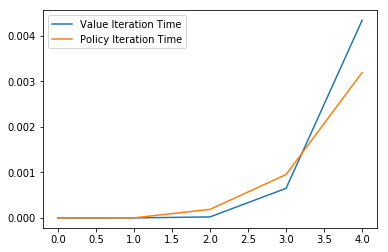

In [7]:
x_axis = [i for i in range(0, 5)]
plt.plot(x_axis, val_iter_time, label="Value Iteration Time")
plt.plot(x_axis, pol_iter_time, label="Policy Iteration Time")
plt.legend()
plt.show()

#### n = 10

In [8]:
val_iter_time = []
pol_iter_time = []

for n in range(0, 10):
    
    # Value Iteration
    frog_MDP = frog.FrogMDP(n)
    last = {}
    v_i = value_iteration(mdp=frog_MDP, gamma=1)
    t_0 = time.time()
    
    for vi in v_i:
        if vi == last: break
        last = vi
    val_iter_time.append(time.time() - t_0)
    
    # Policy Iteration
    p_i = policy_iteration(mdp=frog_MDP, gamma=1)
    t_0 = time.time()
    last = {}
    
    for pi, pp in p_i:
        if pi == last: break
        last = pi
    pol_iter_time.append(time.time() - t_0)

print('Value Iteration Time: ', val_iter_time)
print('Policy Iteration Time: ', pol_iter_time)

Value Iteration Time:  [2.1457672119140625e-06, 0.0, 2.5033950805664062e-05, 0.0006420612335205078, 0.0032341480255126953, 0.012189865112304688, 0.03522777557373047, 0.0922079086303711, 0.22800922393798828, 0.5789268016815186]
Policy Iteration Time:  [2.1457672119140625e-06, 1.1920928955078125e-06, 0.00019979476928710938, 0.0011451244354248047, 0.003290891647338867, 0.007607936859130859, 0.018571853637695312, 0.0452570915222168, 0.10977029800415039, 0.24640107154846191]


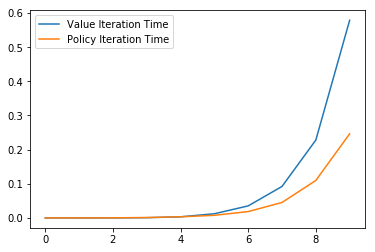

In [9]:
x_axis = [i for i in range(0, 10)]
plt.plot(x_axis, val_iter_time, label="Value Iteration Time")
plt.plot(x_axis, pol_iter_time, label="Policy Iteration Time")
plt.legend()
plt.show()

### As illustrated above, we could see that the policy iteration algorithm is more efficient in terms of speed of convergence. 